## Importing modules

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Introducing the challenge

## What category of problem is this?

You're no novice to data science, but let's make sure we agree on the basics.

As Peter from [DrivenData](https://www.drivendata.org/) explained in the video, you're going to be working with school district budget data. This data can be classified in many ways according to certain labels, e.g. Function: Career & Academic Counseling, or Position_Type: Librarian.

Your goal is to develop a model that predicts the probability for each possible label by relying on some correctly labeled examples.

What type of machine learning problem is this?

* Reinforcement Learning, because the model is learning from the data through a system of rewards and punishments.
* Unsupervised Learning, because the model doesn't output labels with certainty.
* Unsupervised Learning, because not all data is correctly classified to begin with.
* __Supervised Learning, because the model will be trained using labeled examples.__

## What is the goal of the algorithm?

As you know from previous courses, there are different types of supervised machine learning problems. In this exercise you will tell us what type of supervised machine learning problem this is, and why you think so.

Remember, your goal is to correctly label budget line items by training a supervised model to predict the probability of each possible label, taking most probable label as the correct label.

* Regression, because the model will output probabilities.
* __Classification, because predicted probabilities will be used to select a label class.__
* Regression, because probabilities take a continuous value between 0 and 1.
* Classification, because the model will output probabilities.


# Exploring the data

## Loading the data

Now it's time to check out the dataset! You'll use pandas (which has been pre-imported as pd) to load your data into a DataFrame and then do some Exploratory Data Analysis (EDA) of it.

The training data is available as TrainingData.csv. Your first task is to load it into a DataFrame in the IPython Shell using pd.read_csv() along with the keyword argument index_col=0.

Use methods such as .info(), .head(), and .tail() to explore the budget data and the properties of the features and labels.

Some of the column names correspond to features - descriptions of the budget items - such as the Job_Title_Description column. The values in this column tell us if a budget item is for a teacher, custodian, or other employee.

Some columns correspond to the budget item labels you will be trying to predict with your model. For example, the Object_Type column describes whether the budget item is related classroom supplies, salary, travel expenses, etc.

Use df.info() on the dataset

In [31]:
import pandas as pd
df = pd.read_csv('TrainingData.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 25 columns):
FTE                       278 non-null float64
Facility_or_Department    168 non-null object
Function                  1000 non-null object
Function_Description      860 non-null object
Fund_Description          522 non-null object
Job_Title_Description     730 non-null object
Location_Description      562 non-null object
Object_Description        946 non-null object
Object_Type               1000 non-null object
Operating_Status          1000 non-null object
Position_Extra            676 non-null object
Position_Type             1000 non-null object
Pre_K                     1000 non-null object
Program_Description       786 non-null object
Reporting                 1000 non-null object
Sharing                   1000 non-null object
Student_Type              1000 non-null object
SubFund_Description       751 non-null object
Sub_Object_Description    237 non-null object
Text_1     

## Summarizing the data

You'll continue your EDA in this exercise by computing summary statistics for the numeric data in the dataset. The data has been pre-loaded into a DataFrame called df.

You can use df.info() in the IPython Shell to determine which columns of the data are numeric, specifically type float64. You'll notice that there are two numeric columns, called FTE and Total.

* __FTE__: Stands for "full-time equivalent". If the budget item is associated to an employee, this number tells us the percentage of full-time that the employee works. A value of 1 means the associated employee works for the schooll full-time. A value close to 0 means the item is associated to a part-time or contracted employee.
* __Total__: Stands for the total cost of the expenditure. This number tells us how much the budget item cost.

After printing summary statistics for the numeric data, your job is to plot a histogram of the non-null FTE column to see the distribution of part-time and full-time employees in the dataset

              FTE         Total  Unnamed: 0.1
count  278.000000  9.900000e+02    1000.00000
mean     0.465382  1.357286e+04  147045.28000
std      0.450732  7.303305e+04   83845.47265
min      0.000000 -9.610858e+05     198.00000
25%      0.004310  1.074900e+02   75825.75000
50%      0.275625  6.891734e+02  146579.00000
75%      1.000000  4.782195e+03  218195.50000
max      1.007041  1.367500e+06  296299.00000


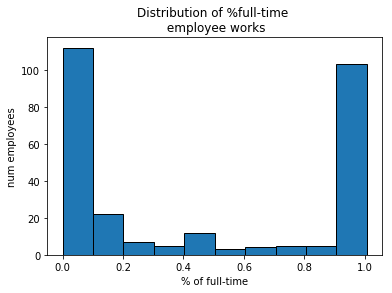

In [32]:
# Print the summary statistics
print(df.describe())

# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create the histogram
plt.hist(df['FTE'].dropna(), edgecolor='k')

# Add title and labels
plt.title('Distribution of %full-time \n employee works')
plt.xlabel('% of full-time')
plt.ylabel('num employees')

# Display the histogram
plt.show()

Nice! The high variance in expenditures makes sense (some purchases are cheap some are expensive). Also, it looks like the FTE column is bimodal. That is, there are some part-time and some full-time employees.

# Looking at the datatypes

## Exploring datatypes in pandas

It's always good to know what datatypes you're working with, especially when the inefficient pandas type object may be involved. Towards that end, let's explore what we have.

Your job is to look at the DataFrame attribute .dtypes in the IPython Shell, and call its .value_counts() method in order to answer the question below.

Make sure to call df.dtypes.value_counts(), and not df.value_counts()! Check out the difference in the Shell. df.value_counts() will return an error, because it is a Series method, not a DataFrame method.

How many columns with dtype object are in the data?

* [dtypes](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.dtypes.html)
* [value_counts()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)

In [33]:
df.dtypes.value_counts()

object     22
float64     2
int64       1
dtype: int64

22


## Encode the labels as categorical variables

Remember, your ultimate goal is to predict the probability that a certain label is attached to a budget line item. You just saw that many columns in your data are the inefficient object type. Does this include the labels you're trying to predict? Let's find out!

There are 9 columns of labels in the dataset. Each of these columns is a category that has many possible values it can take). The 9 labels have been loaded into a list called LABELS. In the Shell, check out the type for these labels using df[LABELS].dtypes.

You will notice that every label is encoded as an object datatype. Because category datatypes are [much more efficient](https://www.anaconda.com/blog/developer-blog/pandas-categoricals/) your task is to convert the labels to category types using the .astype() method.

Note: .astype() only works on a pandas Series. Since you are working with a pandas DataFrame, you'll need to use the .apply() method and provide a lambda function called categorize_label that applies .astype() to each column, x.

* [lambda](http://www.secnetix.de/olli/Python/lambda_functions.hawk)
* [.astype()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.astype.html)
* [.apply()](http://pandas.pydata.org/pandas-docs/version/0.18/generated/pandas.Series.apply.html)

In [34]:
LABELS = ['Function', 'Sharing', 'Reporting', 'Student_Type', 'Position_Type', 'Object_Type', 'Pre_K', 'Operating_Status']

# Define the lambda function: categorize_label
categorize_label = lambda x: x.astype('category')

# Convert df[LABELS] to a categorical type
df[LABELS] = df[LABELS].apply(categorize_label)

# Print the converted dtypes
print(df[LABELS].dtypes)

Function            category
Sharing             category
Reporting           category
Student_Type        category
Position_Type       category
Object_Type         category
Pre_K               category
Operating_Status    category
dtype: object


## Counting unique labels

As Peter mentioned in the video, there are over 100 unique labels. In this exercise, you will explore this fact by counting and plotting the number of unique values for each category of label.

Pandas provides a pd.Series.nunique method for counting the number of unique values in a Series.

* [pd.Series.nunique](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.nunique.html)

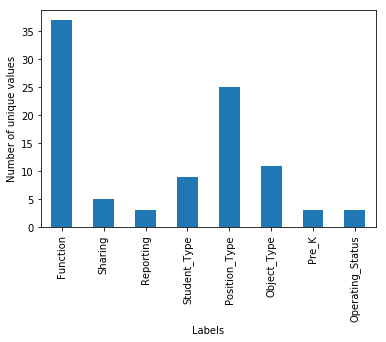

In [35]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Calculate number of unique values for each label: num_unique_labels
num_unique_labels = df[LABELS].apply(pd.Series.nunique)

# Plot number of unique values for each label
num_unique_labels.plot(kind='bar')

# Label the axes
plt.xlabel('Labels')
plt.ylabel('Number of unique values')

# Display the plot
plt.show()

# How do we measure success?

## Penalizing highly confident wrong answers

As Peter explained in the video, log loss provides a steep penalty for predictions that are both wrong and confident, i.e., a high probability is assigned to the incorrect class.

Suppose you have the following 3 examples:

A:y=1,p=0.85

B:y=0,p=0.99

C:y=0,p=0.51

Select the ordering of the examples which corresponds to the lowest to highest log loss scores. y is an indicator of whether the example was classified correctly. You shouldn't need to crunch any numbers!

* Lowest: A, Middle: B, Highest: C.
* Lowest: C, Middle: A, Highest: B.
* __Lowest: A, Middle: C, Highest: B.__
* Lowest: B, Middle: A, Highest: C.

## Computing log loss with NumPy

To see how the log loss metric handles the trade-off between accuracy and confidence, we will use some sample data generated with NumPy and compute the log loss using the provided function compute_log_loss().

5 one-dimensional numeric arrays simulating different types of predictions have been pre-loaded: actual_labels, correct_confident, correct_not_confident, wrong_not_confident, and wrong_confident.

Your job is to compute the log loss for each sample set provided using the compute_log_loss(predicted_values, actual_values). It takes the predicted values as the first argument and the actual values as the second argument.

In [36]:
import numpy as np

def compute_log_loss(predicted, actual, eps=1e-14):
    """ Computes the logarithmic loss between predicted and
    actual when these are 1D arrays.
    :param predicted: The predicted probabilities as floats between 0-1
    :param actual: The actual binary labels. Either 0 or 1.
    :param eps (optional): log(0) is inf, so we need to offset our
    predicted values slightly by eps from 0 or 1.
    """
    
    predicted = np.clip(predicted, eps, 1 - eps)
    loss = -1 * np.mean(actual * np.log(predicted)
    + (1 - actual)
    * np.log(1 - predicted))
   
    return loss

In [37]:
correct_confident = np.array([ 0.95,  0.95,  0.95,  0.95,  0.95,  0.05,  0.05,  0.05,  0.05,  0.05])
correct_not_confident = np.array([ 0.65,  0.65,  0.65,  0.65,  0.65,  0.35,  0.35,  0.35,  0.35,  0.35])
wrong_not_confident = np.array([ 0.35,  0.35,  0.35,  0.35,  0.35,  0.65,  0.65,  0.65,  0.65,  0.65])
wrong_confident = np.array([ 0.05,  0.05,  0.05,  0.05,  0.05,  0.95,  0.95,  0.95,  0.95,  0.95])
actual_labels = np.array([ 1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.])

In [38]:
# Compute and print log loss for 1st case
correct_confident = compute_log_loss(correct_confident, actual_labels)
print("Log loss, correct and confident: {}".format(correct_confident)) 

# Compute log loss for 2nd case
correct_not_confident = compute_log_loss(correct_not_confident, actual_labels)
print("Log loss, correct and not confident: {}".format(correct_not_confident)) 

# Compute and print log loss for 3rd case
wrong_not_confident = compute_log_loss(wrong_not_confident, actual_labels)
print("Log loss, wrong and not confident: {}".format(wrong_not_confident)) 

# Compute and print log loss for 4th case
wrong_confident = compute_log_loss(wrong_confident, actual_labels)
print("Log loss, wrong and confident: {}".format(wrong_confident)) 

# Compute and print log loss for actual labels
actual_labels = compute_log_loss(actual_labels, actual_labels)
print("Log loss, actual labels: {}".format(actual_labels)) 

Log loss, correct and confident: 0.05129329438755058
Log loss, correct and not confident: 0.4307829160924542
Log loss, wrong and not confident: 1.049822124498678
Log loss, wrong and confident: 2.9957322735539904
Log loss, actual labels: 9.99200722162646e-15


## Appendix: Methods

* [dtypes](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.dtypes.html)
* [value_counts()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)
* [lambda](http://www.secnetix.de/olli/Python/lambda_functions.hawk)
* [.astype()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.astype.html)
* [.apply()](http://pandas.pydata.org/pandas-docs/version/0.18/generated/pandas.Series.apply.html)
* [pd.Series.nunique](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.nunique.html)